Web scrapping data from Wikipedia, fetch stock price data and plot the stock closing price. Built with `pandas`, `yfinance`, and `matplotlib`

Source: [List of S&P 500 Companies](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies) (Wikipedia)

Tutorial: [Data Science Web Apps Tutorial by Data Professor](https://www.youtube.com/watch?v=JwSS70SZdyM&list=PLRpb1EfB9cjuOFw_ZVmeqlCgdhYjdbBMO&index=13&ab_channel=freeCodeCamp.org)



# Extracting Data

In [1]:
import pandas as pd

In [2]:
def load_data():
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    html = pd.read_html(url, header=0)
    df = html[0]
    return df

In [3]:
df = load_data()
df

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
4,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...,...
500,YUM,Yum! Brands,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
501,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
502,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


# Simple EDA

## Examining the Sectors

In [4]:
unique_sector = df['GICS Sector'].unique()
unique_sector

array(['Industrials', 'Health Care', 'Information Technology',
       'Communication Services', 'Consumer Discretionary', 'Utilities',
       'Financials', 'Materials', 'Real Estate', 'Consumer Staples',
       'Energy'], dtype=object)

In [5]:
len(unique_sector)

11

## Group by Sector

In [6]:
sector = df.groupby('GICS Sector')

In [7]:
sector.first()

,Symbol,Security,SEC filings,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
GICS Sector,,,,,,,,
Communication Services,ATVI,Activision Blizzard,reports,Interactive Home Entertainment,"Santa Monica, California",2015-08-31,718877,2008
Consumer Discretionary,AAP,Advance Auto Parts,reports,Automotive Retail,"Raleigh, North Carolina",2015-07-09,1158449,1932
Consumer Staples,MO,Altria Group,reports,Tobacco,"Richmond, Virginia",1957-03-04,764180,1985
Energy,APA,APA Corporation,reports,Oil & Gas Exploration & Production,"Houston, Texas",1997-07-28,6769,1954
Financials,AFL,Aflac,reports,Life & Health Insurance,"Columbus, Georgia",1999-05-28,4977,1955
Health Care,ABT,Abbott Laboratories,reports,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
Industrials,MMM,3M,reports,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
Information Technology,ACN,Accenture,reports,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
Materials,APD,Air Products & Chemicals,reports,Industrial Gases,"Allentown, Pennsylvania",1985-04-30,2969,1940


In [8]:
sector.describe()

CIK                                                   \
                       count          mean            std      min        25%   
GICS Sector                                                                     
Communication Services  26.0  1.115660e+06  524383.320718  18926.0  752994.75   
Consumer Discretionary  63.0  8.477582e+05  475172.166505  27419.0  723858.50   
Consumer Staples        32.0  3.872794e+05  564407.571740   7084.0   24213.00   
Energy                  22.0  7.790030e+05  606535.723781   4447.0   95502.00   
Financials              65.0  6.313738e+05  542517.054005   4962.0   64040.00   
Health Care             64.0  8.158064e+05  527611.451375   1800.0  312903.00   
Industrials             74.0  6.859374e+05  592033.294395   4281.0   79229.75   
Information Technology  74.0  8.987211e+05  499064.848336   2488.0  743484.00   
Materials               28.0  8.369064e+05  699182.236462   2969.0   67840.25   
Real Estate             29.0  8.957202e+05  327862.587502  34903.0  783280.00   
Utilities               28.0  8.035041e+05  431315.460314   4904.0  727840.75   

                                                          
                              50%         75%        max  
GICS Sector                                               
Communication Services  1225195.0  1532807.75  1754301.0  
Consumer Discretionary   920760.0  1164229.50  1590895.0  
Consumer Staples          70615.0   789573.00  1679273.0  
Energy                   940165.0  1144876.75  1701605.0  
Financials               720005.0  1120193.00  1601712.0  
Health Care              880632.0  1097811.75  1821825.0  
Industrials              756468.0  1084970.50  1783180.0  
Information Technology   880565.5  1275848.75  1730168.0  
Materials                915994.5  1419355.00  1755672.0  
Real Estate              920522.0  1053507.00  1393311.0  
Utilities                850906.5  1036121.50  1711269.0

## Examine Data by Sector

In [9]:
sector.get_group('Health Care') # change the sector name to examin

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
11,A,Agilent Technologies,reports,Health Care,Health Care Equipment,"Santa Clara, California",2000-06-05,1090872,1999
17,ALXN,Alexion Pharmaceuticals,reports,Health Care,Pharmaceuticals,"Boston, Massachusetts",2012-05-25,899866,1992
...,...,...,...,...,...,...,...,...,...
474,VTRS,Viatris,reports,Health Care,Pharmaceuticals,"Pittsburgh, Pennsylvania",2004-04-23,1792044,1961
484,WAT,Waters Corporation,reports,Health Care,Health Care Distributors,"Milford, Massachusetts",NaN,1000697,1958
488,WST,West Pharmaceutical Services,reports,Health Care,Health Care Supplies,"Exton, Pennsylvania",2020-05-22,105770,1923
502,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


# Finance Data

Now we retrieve the stock price data using the symbols of the companies listed above.

In [10]:
import yfinance as yf

## List of S&P Companies Symbols

In [11]:
list_of_symbols = list(df.Symbol)

## Retrieve Stock Data

Retrieve all stock data of all S&P companies using `yfinance`

In [12]:
# https://pypi.org/project/yfinance/

data = yf.download(

    # tickers list or string
    tickers = list_of_symbols, # list(df.Symbol)

    # use "period" instead of "start"/"end"
    # valid periods: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
    # optional, default value: 1mo
    period="ytd",

    # fetch data by interval (including intraday if period < 60 days)
    # valid internvals: 1m, 2m, 5m, 15m, 30m, 60m, 90, 1h, 1d, 5d, 1wk, 1mo, 3mo
    # optional, default value: 1d
    interval="1d",

    # group by ticker (to access via data['SPY'])
    # optional, default value is column
    group_by="ticker",

    # adjust all OHLC automatically
    # optional, default is False
    auto_adjust=True,

    # download pre/post regular market hours data
    # optional, default is False
    perpost=True,

    # use threads for mass downloading it
    # optional, default is True
    threads=True,

    # proxy URL scheme use use when downloading
    # optional, default is None
    proxy=None
)

[*********************100%***********************]  505 of 505 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No data found, symbol may be delisted


In [15]:
data

FTV                                                  GRMN  \
                 Open       High        Low      Close   Volume        Open   
Date                                                                          
2021-01-04  70.857513  71.037152  68.522213  68.671906  2233000  118.666088   
2021-01-05  68.731794  69.405435  67.953353  68.362534  2591800  117.021666   
2021-01-06  69.140967  71.236751  68.871512  70.927376  3680400  117.576420   
2021-01-07  71.396429  72.693815  70.777670  72.404404  2120700  118.646273   
2021-01-08  72.663876  73.262678  71.905406  72.434341  1730100  121.291232   
...               ...        ...        ...        ...      ...         ...   
2021-06-25  69.900002  70.379997  69.480003  69.930000  4984400  143.929993   
2021-06-28  70.160004  70.595001  68.955002  70.209999  4240700  144.699997   
2021-06-29  70.320000  70.610001  69.629997  70.169998  2732000  144.619995   
2021-06-30  69.940002  70.489998  69.550003  69.739998  4115600  145.630005   
2021-07-01  69.889999  70.550003  69.879997  70.239998   927798  145.270004   

                                                        ...          O  \
                  High         Low       Close  Volume  ...       Open   
Date                                                    ...              
2021-01-04  119.518020  116.764104  117.685379  785000  ...  60.847179   
2021-01-05  117.814163  116.110299  117.447632  715600  ...  58.713898   
2021-01-06  118.547221  116.813640  118.359009  921200  ...  59.301040   
2021-01-07  121.598317  118.527404  120.419479  662900  ...  58.488832   
2021-01-08  121.786540  119.577460  120.835548  564100  ...  57.735337   
...                ...         ...         ...     ...  ...        ...   
2021-06-25  144.710007  143.789993  144.369995  450400  ...  67.175879   
2021-06-28  144.699997  143.660004  144.270004  676800  ...  67.933229   
2021-06-29  145.830002  144.529999  145.380005  399800  ...  67.604378   
2021-06-30  145.779999  143.910004  144.639999  529700  ...  67.660004   
2021-07-01  145.589996  144.700500  145.110001  102861  ...  65.760002   

                                                             BXP              \
                 High        Low      Close   Volume        Open        High   
Date                                                                           
2021-01-04  60.925462  58.537765  58.576908  3842300   93.601489   94.249722   
2021-01-05  59.447822  58.655183  58.870468  2714900   89.692418   91.165684   
2021-01-06  59.369540  58.077834  58.371407  4142100   89.044192   91.116580   
2021-01-07  58.498616  57.304769  57.637482  4169500   89.820097   89.820097   
2021-01-08  58.576903  57.598338  58.459476  3198200   88.445058   89.260259   
...               ...        ...        ...      ...         ...         ...   
2021-06-25  67.973096  66.827088  67.893372  3884200  118.229013  119.230528   
2021-06-28  68.012953  67.275525  67.594414  4583000  118.595908  118.804144   
2021-06-29  68.262090  67.454905  67.713997  4132000  115.449997  116.339996   
2021-06-30  68.279999  66.629997  66.739998  4156000  113.559998  115.160004   
2021-07-01  66.800003  65.750000  66.785004  2917305  114.599998  115.309998   

                                             
                   Low       Close   Volume  
Date                                         
2021-01-04   89.132580   89.201332  1240100  
2021-01-05   88.386121   88.484337  1200500  
2021-01-06   88.160231   89.790642  1960000  
2021-01-07   87.786990   88.641487  1179600  
2021-01-08   87.551273   88.435234  1123300  
...                ...         ...      ...  
2021-06-25  117.515057  118.794228   880700  
2021-06-28  114.054357  115.750008  1437700  
2021-06-29  113.790001  113.830002   912900  
2021-06-30  113.559998  114.589996   927800  
2021-07-01  114.190002  115.309998   110882  

[125 rows x 2527 columns]

## Data Subset of Query Symbol

In [16]:
data['AAPL'] # using APPLE as an example

,Open,High,Low,Close,Volume
Date,,,,,
2021-01-04,133.094712,133.184422,126.356242,128.997803,143301900
2021-01-05,128.479455,131.320383,128.020913,130.592697,97664900
2021-01-06,127.313182,130.632577,125.977446,126.196747,155088000
2021-01-07,127.951147,131.210736,127.452740,130.502991,109578200
2021-01-08,132.008159,132.207534,129.815169,131.629379,105158200
...,...,...,...,...,...
2021-06-25,133.460007,133.889999,132.809998,133.110001,70730700
2021-06-28,133.410004,135.250000,133.350006,134.779999,62111300
2021-06-29,134.800003,136.490005,134.350006,136.330002,64556100


## Plot Closing Price of Query Symbol

In [17]:
import matplotlib.pyplot as plt

In [18]:
df = pd.DataFrame(data['AAPL'].Close)
df['Date'] = df.index
df

,Close,Date
Date,,
2021-01-04,128.997803,2021-01-04
2021-01-05,130.592697,2021-01-05
2021-01-06,126.196747,2021-01-06
2021-01-07,130.502991,2021-01-07
2021-01-08,131.629379,2021-01-08
...,...,...
2021-06-25,133.110001,2021-06-25
2021-06-28,134.779999,2021-06-28
2021-06-29,136.330002,2021-06-29


Text(0, 0.5, 'Closing Price')

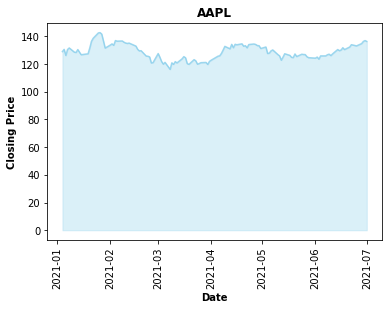

In [19]:
plt.fill_between(df.Date, df.Close, color='skyblue', alpha=0.3)
plt.plot(df.Date, df.Close, color='skyblue', alpha=0.8)
plt.xticks(rotation=90)
plt.title('AAPL', fontweight='bold')
plt.xlabel('Date', fontweight='bold')
plt.ylabel('Closing Price', fontweight='bold')

In [20]:
# custom function (in the code)

# Plot Closing Price of Query Symbol
def price_plot(symbol):
  df = pd.DataFrame(data[symbol].Close)
  df['Date'] = df.index
  plt.fill_between(df.Date, df.Close, color='skyblue', alpha=0.3)
  plt.plot(df.Date, df.Close, color='skyblue', alpha=0.8)
  plt.xticks(rotation=90)
  plt.title(symbol, fontweight='bold')
  plt.xlabel('Date', fontweight='bold')
  plt.ylabel('Closing Price', fontweight='bold')
  return plt.show()

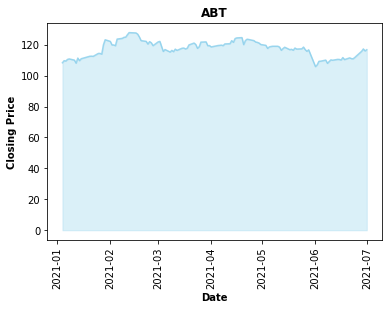

In [21]:
# plot stock price for ABT
price_plot('ABT')

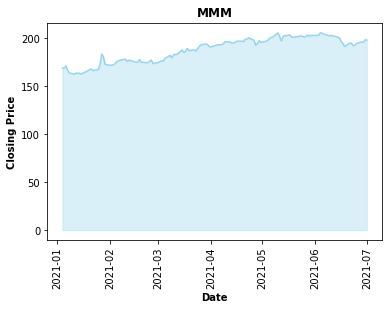

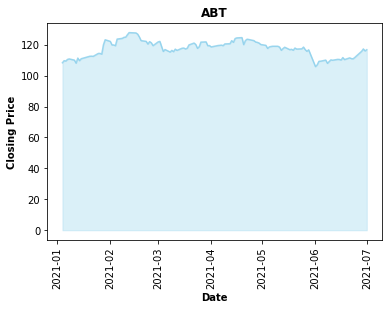

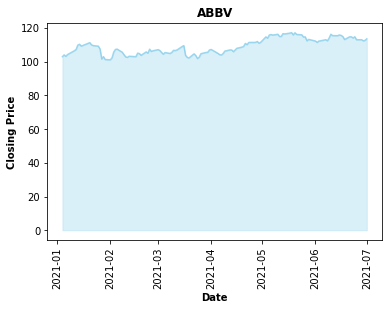

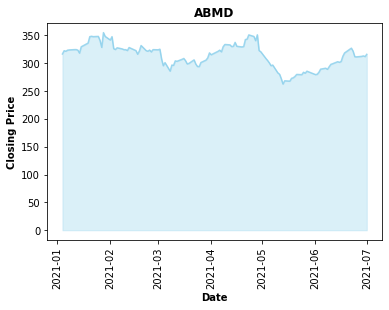

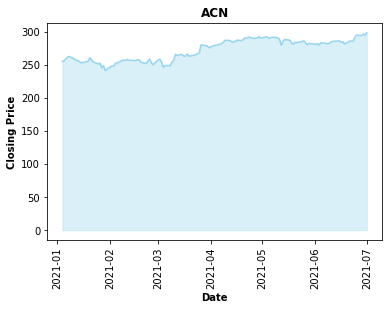

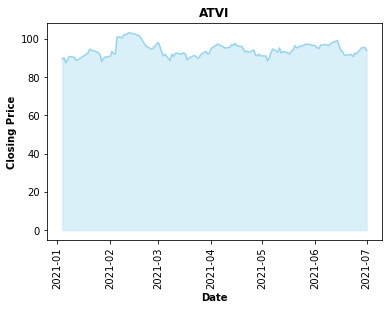

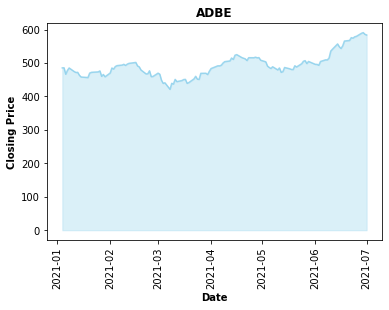

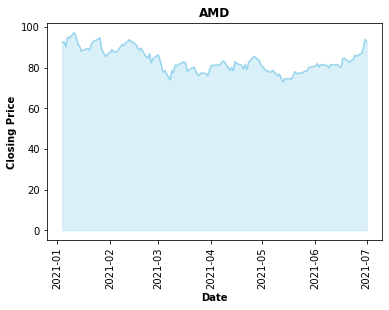

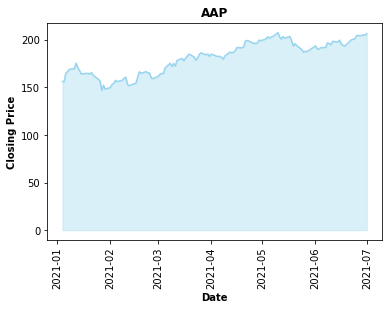

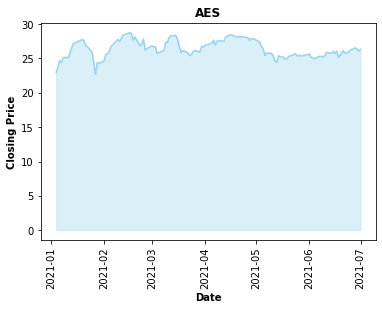

In [22]:
# plot stock price for first 10 companies
for symbol in list_of_symbols[:10]:
    price_plot(symbol)